In [61]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import utils

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout, Input
from tensorflow.keras.utils import normalize

tf.__version__

'2.0.0'

In [62]:
df = pd.read_csv('dowjone1985_2019.csv')

In [63]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-12,25959.330078,25966.710938,25340.509766,25387.179688,25387.179688,346910000
1,2018-11-13,25321.210938,25511.029297,25193.779297,25286.490234,25286.490234,339690000
2,2018-11-14,25388.080078,25501.289063,24935.820313,25080.500000,25080.500000,384240000
3,2018-11-15,25061.480469,25354.560547,24787.789063,25289.269531,25289.269531,392750000
4,2018-11-16,25242.349609,25510.230469,25147.800781,25413.220703,25413.220703,354460000


In [64]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,25875.222485,26004.969404,25731.774846,25878.498584,25878.498584,3.011524e+08
std,1097.917118,1051.765134,1146.942794,1096.000598,1096.000598,1.461091e+08
min,21857.730469,22339.869141,21712.529297,21792.199219,21792.199219,7.253726e+06
25%,25359.475586,25510.629883,25215.254883,25388.740235,25388.740235,2.417300e+08
50%,26040.300781,26160.119141,25896.560547,26029.519531,26029.519531,2.816900e+08
75%,26726.364258,26822.000000,26609.680664,26723.334961,26723.334961,3.283850e+08
max,27686.199219,27774.669922,27590.160156,27681.240234,27681.240234,2.190810e+09


In [65]:
df = df.drop('Adj Close', axis=1)

In [66]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-11-12,25959.330078,25966.710938,25340.509766,25387.179688,346910000
1,2018-11-13,25321.210938,25511.029297,25193.779297,25286.490234,339690000
2,2018-11-14,25388.080078,25501.289063,24935.820313,25080.500000,384240000
3,2018-11-15,25061.480469,25354.560547,24787.789063,25289.269531,392750000
4,2018-11-16,25242.349609,25510.230469,25147.800781,25413.220703,354460000


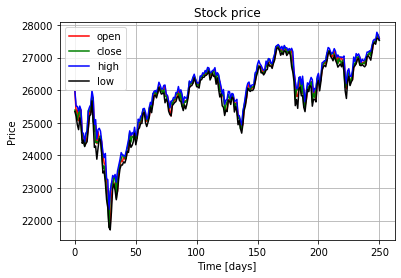

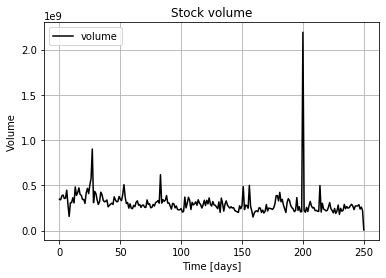

In [67]:
utils.plot_raw(df)

In [68]:
df_index = df.drop('Date', axis=1)

In [69]:
df_index.head()

,Open,High,Low,Close,Volume
0,25959.330078,25966.710938,25340.509766,25387.179688,346910000
1,25321.210938,25511.029297,25193.779297,25286.490234,339690000
2,25388.080078,25501.289063,24935.820313,25080.500000,384240000
3,25061.480469,25354.560547,24787.789063,25289.269531,392750000
4,25242.349609,25510.230469,25147.800781,25413.220703,354460000


In [70]:
df_index = df_index.drop('Volume', axis=1)

In [71]:
df_index.head()

,Open,High,Low,Close
0,25959.330078,25966.710938,25340.509766,25387.179688
1,25321.210938,25511.029297,25193.779297,25286.490234
2,25388.080078,25501.289063,24935.820313,25080.500000
3,25061.480469,25354.560547,24787.789063,25289.269531
4,25242.349609,25510.230469,25147.800781,25413.220703


In [72]:
cols = list(df_index.columns.values)
print('Col : ', cols)

Col :  ['Open', 'High', 'Low', 'Close']


In [ ]:
# rearrange columns ,for training with volume
# n_cols = cols[:3] + [cols[-1]] + [cols[-2]]
# df_index = df_index[n_cols] 

# print("new Cols: ",list(df_index.columns.values))

# parameter for preprocessing #

In [73]:
val_set_size_percentage = 10
test_set_size_percentage = 10
seq_len = 20

In [74]:
test_set_size_percentage

10

In [75]:
# normalize index
df_index_norm = normalize(df_index, axis=-1, order=2)

In [76]:
df_index_norm

,Open,High,Low,Close
0,0.505730,0.505874,0.493675,0.494584
1,0.499858,0.503605,0.497343,0.499173
2,0.503184,0.505427,0.494220,0.497087
3,0.498751,0.504583,0.493304,0.503284
4,0.498294,0.503582,0.496427,0.501667
...,...,...,...,...
246,0.499973,0.501066,0.499124,0.499835
247,0.500371,0.500795,0.498644,0.500186
248,0.498782,0.502117,0.498782,0.500312
249,0.500467,0.500625,0.498528,0.500377


In [77]:
# split train, val, test data

x_train, y_train, x_val, y_val, x_test, y_test = utils.load_data(df_index_norm, seq_len)

print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_val.shape = ', x_val.shape)
print('y_val.shape = ', y_val.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

x_train.shape =  (185, 19, 4)
y_train.shape =  (185, 4)
x_val.shape =  (23, 19, 4)
y_val.shape =  (23, 4)
x_test.shape =  (23, 19, 4)
y_test.shape =  (23, 4)


In [78]:
print(y_train[0]); print(x_train[0]); 

[0.50393743 0.50539195 0.49376793 0.49680909]
[[0.5057304  0.50587419 0.49367476 0.49458397]
 [0.49985827 0.50360542 0.49734268 0.49917286]
 [0.50318363 0.5054274  0.49421999 0.49708749]
 [0.49875068 0.50458329 0.49330392 0.50328393]
 [0.4982935  0.50358157 0.49642707 0.50166656]
 [0.50428436 0.50428436 0.49452086 0.49683367]
 [0.50159305 0.50339782 0.49650555 0.49847496]
 [0.50013561 0.50274695 0.49853848 0.49856721]
 [0.50023365 0.50172183 0.49884289 0.49919662]
 [0.4970063  0.50331285 0.4970063  0.50263868]
 [0.49875073 0.50268499 0.49588724 0.50264437]
 [0.49464489 0.50532326 0.49464489 0.50527346]
 [0.50004701 0.50271832 0.49726772 0.49995209]
 [0.4979383  0.50271106 0.49683311 0.50248971]
 [0.49932499 0.50321121 0.4972126  0.50023261]
 [0.50708089 0.5074857  0.49242228 0.49279563]
 [0.50032668 0.50464665 0.49031103 0.5045791 ]
 [0.5049524  0.50853503 0.49210425 0.49421514]
 [0.50140262 0.50428127 0.49153179 0.50268511]]


In [79]:
df_index.head(2)

,Open,High,Low,Close
0,25959.330078,25966.710938,25340.509766,25387.179688
1,25321.210938,25511.029297,25193.779297,25286.490234


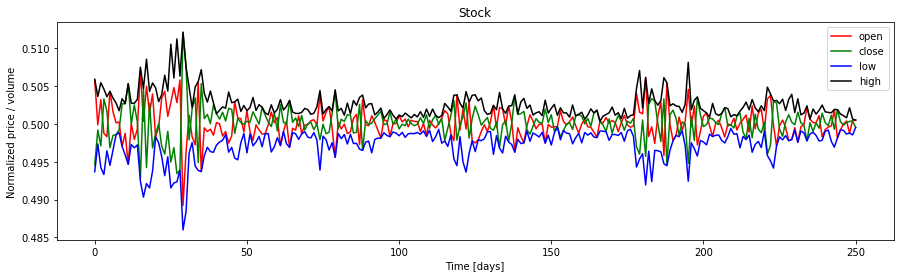

In [80]:
plt.figure(figsize=(15, 4))
plt.plot(df_index_norm['Open'], color='red', label='open')
plt.plot(df_index_norm['Close'], color='green', label='close')
plt.plot(df_index_norm['Low'], color='blue', label='low')
plt.plot(df_index_norm['High'], color='black', label='high')
plt.title('Stock')
plt.xlabel('Time [days]')
plt.ylabel('Normalized price / volume')
plt.legend(loc='best')
plt.show()

In [81]:
from tensorflow.keras import backend as K
K.clear_session()

In [82]:
from tensorflow.keras.layers import Bidirectional,TimeDistributed,BatchNormalization,Flatten
n_steps = seq_len - 1

def get_bi_gru():
    
    input1 = Input(shape=(19,4,))
    x = Bidirectional(LSTM(200,activation='relu', return_sequences=True))(input1)
    x = TimeDistributed(BatchNormalization())(x)
    x = LSTM(200,activation='relu')(x)
    #x = Dense(200,activation='relu')(x)
    x = (BatchNormalization())(x)
    out = Dense(4,activation='linear')(x)

    
    
    model = Model(inputs=input1, outputs=out)
    model.compile(optimizer=Adam(0.005),
                loss='mse',
                metrics=['mse'])   
    
    return model

In [83]:
model = get_bi_gru()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19, 4)]           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 19, 400)           328000    
_________________________________________________________________
time_distributed (TimeDistri (None, 19, 400)           1600      
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               480800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense (Dense)                (None, 4)                 804       
Total params: 812,004
Trainable params: 810,804
Non-trainable params: 1,200
___________________________________________________

In [85]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
print('start training ')


# weight_path_model = "saved_model/model500ep_novolume.h5"
# callbacks_list_model = [
#     ModelCheckpoint(
#              weight_path_model,
#             save_best_only=True,
#             save_weights_only=True,
#             monitor='val_loss',
#             mode='min',
#             verbose=2
#         ),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, min_lr=0.0001)
# ]

#################
batch_size = 256
epochs = 500
#################

history = model.fit(x_train, y_train, epochs=epochs, verbose=2, 
          validation_data=(x_val, y_val),batch_size=batch_size) #batch_size=batch_size




start training 
Train on 185 samples, validate on 23 samples
Epoch 1/500
185/185 - 21s - loss: 0.2524 - mse: 0.2524 - val_loss: 0.1807 - val_mse: 0.1807
Epoch 2/500
185/185 - 1s - loss: 0.3032 - mse: 0.3032 - val_loss: 0.1562 - val_mse: 0.1562
Epoch 3/500
185/185 - 1s - loss: 0.1721 - mse: 0.1721 - val_loss: 0.1337 - val_mse: 0.1337
Epoch 4/500
185/185 - 1s - loss: 0.1369 - mse: 0.1369 - val_loss: 0.1010 - val_mse: 0.1010
Epoch 5/500
185/185 - 1s - loss: 0.3365 - mse: 0.3365 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 6/500
185/185 - 1s - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 7/500
185/185 - 1s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 8/500
185/185 - 1s - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 9/500
185/185 - 1s - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 10/500
185/185 - 1s - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 11/500
185/185 - 1s -

Epoch 86/500
185/185 - 1s - loss: 1.6756e-05 - mse: 1.6756e-05 - val_loss: 0.0508 - val_mse: 0.0508
Epoch 87/500
185/185 - 1s - loss: 1.0049e-05 - mse: 1.0049e-05 - val_loss: 0.0521 - val_mse: 0.0521
Epoch 88/500
185/185 - 1s - loss: 5.5418e-06 - mse: 5.5418e-06 - val_loss: 0.0533 - val_mse: 0.0533
Epoch 89/500
185/185 - 1s - loss: 4.1314e-06 - mse: 4.1314e-06 - val_loss: 0.0546 - val_mse: 0.0546
Epoch 90/500
185/185 - 1s - loss: 5.4449e-06 - mse: 5.4449e-06 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 91/500
185/185 - 1s - loss: 8.2478e-06 - mse: 8.2478e-06 - val_loss: 0.0572 - val_mse: 0.0572
Epoch 92/500
185/185 - 1s - loss: 1.1000e-05 - mse: 1.1000e-05 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 93/500
185/185 - 1s - loss: 1.2534e-05 - mse: 1.2534e-05 - val_loss: 0.0596 - val_mse: 0.0596
Epoch 94/500
185/185 - 1s - loss: 1.2262e-05 - mse: 1.2262e-05 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 95/500
185/185 - 1s - loss: 1.0459e-05 - mse: 1.0459e-05 - val_loss: 0.0619 - val_mse: 0.0619


Epoch 168/500
185/185 - 1s - loss: 3.1258e-06 - mse: 3.1258e-06 - val_loss: 0.1644 - val_mse: 0.1644
Epoch 169/500
185/185 - 2s - loss: 3.0921e-06 - mse: 3.0921e-06 - val_loss: 0.1659 - val_mse: 0.1659
Epoch 170/500
185/185 - 1s - loss: 3.1067e-06 - mse: 3.1067e-06 - val_loss: 0.1676 - val_mse: 0.1676
Epoch 171/500
185/185 - 1s - loss: 3.0834e-06 - mse: 3.0834e-06 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 172/500
185/185 - 2s - loss: 3.0880e-06 - mse: 3.0880e-06 - val_loss: 0.1709 - val_mse: 0.1709
Epoch 173/500
185/185 - 1s - loss: 3.0755e-06 - mse: 3.0755e-06 - val_loss: 0.1723 - val_mse: 0.1723
Epoch 174/500
185/185 - 1s - loss: 3.0735e-06 - mse: 3.0735e-06 - val_loss: 0.1739 - val_mse: 0.1739
Epoch 175/500
185/185 - 1s - loss: 3.0687e-06 - mse: 3.0687e-06 - val_loss: 0.1757 - val_mse: 0.1757
Epoch 176/500
185/185 - 1s - loss: 3.0588e-06 - mse: 3.0588e-06 - val_loss: 0.1773 - val_mse: 0.1773
Epoch 177/500
185/185 - 1s - loss: 3.0596e-06 - mse: 3.0596e-06 - val_loss: 0.1788 - val_ms

185/185 - 1s - loss: 2.8848e-06 - mse: 2.8848e-06 - val_loss: 0.3546 - val_mse: 0.3546
Epoch 250/500
185/185 - 1s - loss: 2.8839e-06 - mse: 2.8839e-06 - val_loss: 0.3579 - val_mse: 0.3579
Epoch 251/500
185/185 - 1s - loss: 2.8830e-06 - mse: 2.8830e-06 - val_loss: 0.3613 - val_mse: 0.3613
Epoch 252/500
185/185 - 1s - loss: 2.8816e-06 - mse: 2.8816e-06 - val_loss: 0.3646 - val_mse: 0.3646
Epoch 253/500
185/185 - 1s - loss: 2.8804e-06 - mse: 2.8804e-06 - val_loss: 0.3679 - val_mse: 0.3679
Epoch 254/500
185/185 - 1s - loss: 2.8790e-06 - mse: 2.8790e-06 - val_loss: 0.3713 - val_mse: 0.3713
Epoch 255/500
185/185 - 1s - loss: 2.8780e-06 - mse: 2.8780e-06 - val_loss: 0.3746 - val_mse: 0.3746
Epoch 256/500
185/185 - 1s - loss: 2.8768e-06 - mse: 2.8768e-06 - val_loss: 0.3781 - val_mse: 0.3781
Epoch 257/500
185/185 - 1s - loss: 2.8763e-06 - mse: 2.8763e-06 - val_loss: 0.3815 - val_mse: 0.3815
Epoch 258/500
185/185 - 1s - loss: 2.8746e-06 - mse: 2.8746e-06 - val_loss: 0.3850 - val_mse: 0.3850
Epoc

Epoch 331/500
185/185 - 1s - loss: 2.8097e-06 - mse: 2.8097e-06 - val_loss: 0.7208 - val_mse: 0.7208
Epoch 332/500
185/185 - 1s - loss: 2.8082e-06 - mse: 2.8082e-06 - val_loss: 0.7265 - val_mse: 0.7265
Epoch 333/500
185/185 - 1s - loss: 2.8087e-06 - mse: 2.8087e-06 - val_loss: 0.7324 - val_mse: 0.7324
Epoch 334/500
185/185 - 1s - loss: 2.8074e-06 - mse: 2.8074e-06 - val_loss: 0.7383 - val_mse: 0.7383
Epoch 335/500
185/185 - 1s - loss: 2.8070e-06 - mse: 2.8070e-06 - val_loss: 0.7441 - val_mse: 0.7441
Epoch 336/500
185/185 - 1s - loss: 2.8067e-06 - mse: 2.8067e-06 - val_loss: 0.7500 - val_mse: 0.7500
Epoch 337/500
185/185 - 1s - loss: 2.8051e-06 - mse: 2.8051e-06 - val_loss: 0.7560 - val_mse: 0.7560
Epoch 338/500
185/185 - 1s - loss: 2.8049e-06 - mse: 2.8049e-06 - val_loss: 0.7620 - val_mse: 0.7620
Epoch 339/500
185/185 - 1s - loss: 2.8042e-06 - mse: 2.8042e-06 - val_loss: 0.7680 - val_mse: 0.7680
Epoch 340/500
185/185 - 1s - loss: 2.8033e-06 - mse: 2.8033e-06 - val_loss: 0.7741 - val_ms

185/185 - 1s - loss: 2.7598e-06 - mse: 2.7598e-06 - val_loss: 1.2879 - val_mse: 1.2879
Epoch 413/500
185/185 - 1s - loss: 2.7590e-06 - mse: 2.7590e-06 - val_loss: 1.2962 - val_mse: 1.2962
Epoch 414/500
185/185 - 1s - loss: 2.7588e-06 - mse: 2.7588e-06 - val_loss: 1.3044 - val_mse: 1.3044
Epoch 415/500
185/185 - 1s - loss: 2.7581e-06 - mse: 2.7581e-06 - val_loss: 1.3128 - val_mse: 1.3128
Epoch 416/500
185/185 - 1s - loss: 2.7580e-06 - mse: 2.7580e-06 - val_loss: 1.3212 - val_mse: 1.3212
Epoch 417/500
185/185 - 1s - loss: 2.7569e-06 - mse: 2.7569e-06 - val_loss: 1.3294 - val_mse: 1.3294
Epoch 418/500
185/185 - 1s - loss: 2.7569e-06 - mse: 2.7569e-06 - val_loss: 1.3375 - val_mse: 1.3375
Epoch 419/500
185/185 - 1s - loss: 2.7562e-06 - mse: 2.7562e-06 - val_loss: 1.3459 - val_mse: 1.3459
Epoch 420/500
185/185 - 1s - loss: 2.7553e-06 - mse: 2.7553e-06 - val_loss: 1.3542 - val_mse: 1.3542
Epoch 421/500
185/185 - 1s - loss: 2.7551e-06 - mse: 2.7551e-06 - val_loss: 1.3625 - val_mse: 1.3625
Epoc

Epoch 494/500
185/185 - 1s - loss: 2.7701e-06 - mse: 2.7701e-06 - val_loss: 1.9124 - val_mse: 1.9124
Epoch 495/500
185/185 - 1s - loss: 2.7662e-06 - mse: 2.7662e-06 - val_loss: 1.9217 - val_mse: 1.9217
Epoch 496/500
185/185 - 1s - loss: 2.7433e-06 - mse: 2.7433e-06 - val_loss: 1.9271 - val_mse: 1.9271
Epoch 497/500
185/185 - 1s - loss: 2.7397e-06 - mse: 2.7397e-06 - val_loss: 1.9314 - val_mse: 1.9314
Epoch 498/500
185/185 - 1s - loss: 2.7352e-06 - mse: 2.7352e-06 - val_loss: 1.9383 - val_mse: 1.9383
Epoch 499/500
185/185 - 1s - loss: 2.7272e-06 - mse: 2.7272e-06 - val_loss: 1.9439 - val_mse: 1.9439
Epoch 500/500
185/185 - 1s - loss: 2.7364e-06 - mse: 2.7364e-06 - val_loss: 1.9468 - val_mse: 1.9468


In [30]:
model.save("saved_model/model001epVolume.h5")

In [32]:
from tensorflow.keras.models import load_model
model = load_model("saved_model/model00epVolume.h5")


In [33]:
x_train.shape
y_train.shape

(185, 4)

In [34]:
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

In [35]:
print(y_test_pred[0])

[0.7303325 0.9697435 0.7946166 0.7962824]


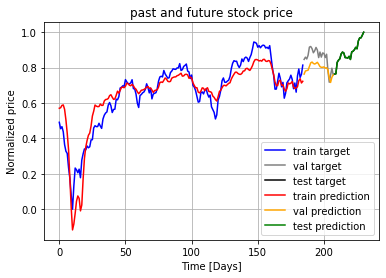

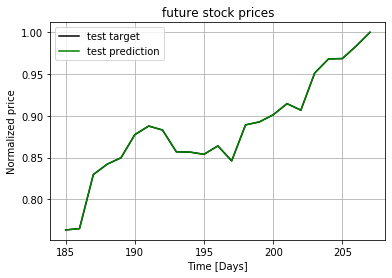

In [36]:
utils.plot_result(y_train, y_val, y_test, y_train_pred, y_val_pred, y_test)


In [86]:
evaluate(x_test,y_test)

NameError: name 'evaluate' is not defined